In [1]:
from numpy import *
from PIL import Image
import pickle
from pylab import *
import os
from scipy.misc import *
from matplotlib.pyplot import *
from scipy.ndimage import filters, morphology, measurements

In [2]:
path = 'sudoku_images/sudokus/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.JPG')]

In [3]:
print imlist

['sudoku_images/sudokus/sudoku6.JPG', 'sudoku_images/sudokus/sudoku15.JPG', 'sudoku_images/sudokus/sudoku24.JPG', 'sudoku_images/sudokus/sudoku18.JPG', 'sudoku_images/sudokus/sudoku10.JPG', 'sudoku_images/sudokus/sudoku17.JPG', 'sudoku_images/sudokus/sudoku13.JPG', 'sudoku_images/sudokus/sudoku19.JPG', 'sudoku_images/sudokus/sudoku20.JPG', 'sudoku_images/sudokus/sudoku21.JPG', 'sudoku_images/sudokus/sudoku16.JPG', 'sudoku_images/sudokus/sudoku2.JPG', 'sudoku_images/sudokus/sudoku11.JPG', 'sudoku_images/sudokus/sudoku14.JPG', 'sudoku_images/sudokus/sudoku9.JPG', 'sudoku_images/sudokus/sudoku23.JPG', 'sudoku_images/sudokus/sudoku8.JPG', 'sudoku_images/sudokus/sudoku1.JPG', 'sudoku_images/sudokus/sudoku22.JPG', 'sudoku_images/sudokus/sudoku5.JPG', 'sudoku_images/sudokus/sudoku12.JPG', 'sudoku_images/sudokus/sudoku4.JPG', 'sudoku_images/sudokus/sudoku3.JPG', 'sudoku_images/sudokus/sudoku7.JPG']


In [4]:
im = array(Image.open(imlist[19]).convert('L'))

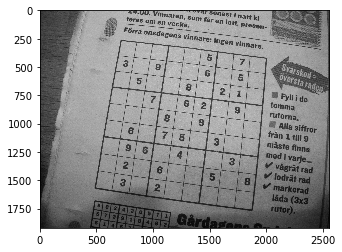

In [5]:
figure()
gray()
imshow(im)
show()

In [6]:
print im.shape

(1920, 2560)


In [7]:
sigma = 3
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)
imxy = sqrt(imx**2 + imy**2)

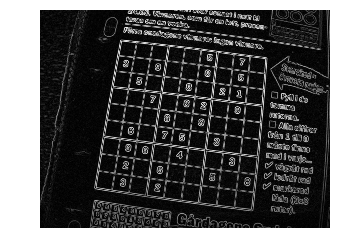

In [8]:
figure()
gray()
imshow(imxy)
axis('off')
show()

In [9]:
sigma1 = 5
sigma2 = 7
im1 = filters.gaussian_filter(im, sigma1)
im2 = filters.gaussian_filter(im, sigma2)
im3 = im1 - im2
im3 = sqrt(im3**2)
im3 = im3/np.max(im3)
im3 = 255*(im3>0.4)
im3 = im3.astype(uint8)

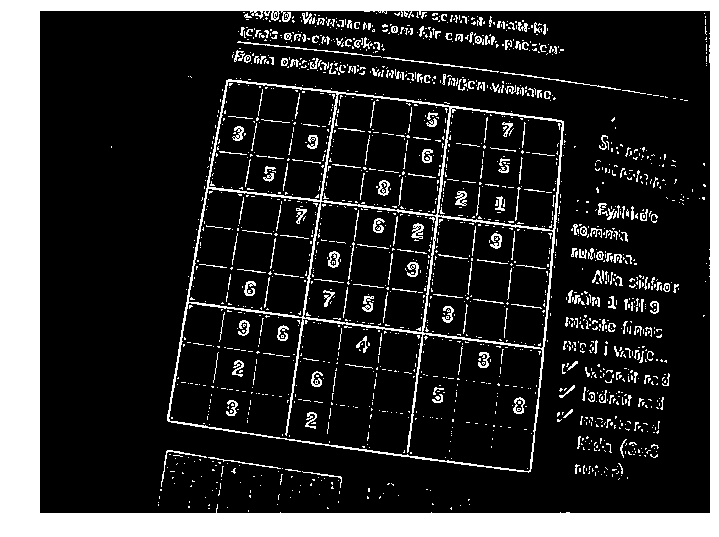

In [10]:
figure(figsize=(12, 12))
gray()
imshow(im3)
axis('off')
show()

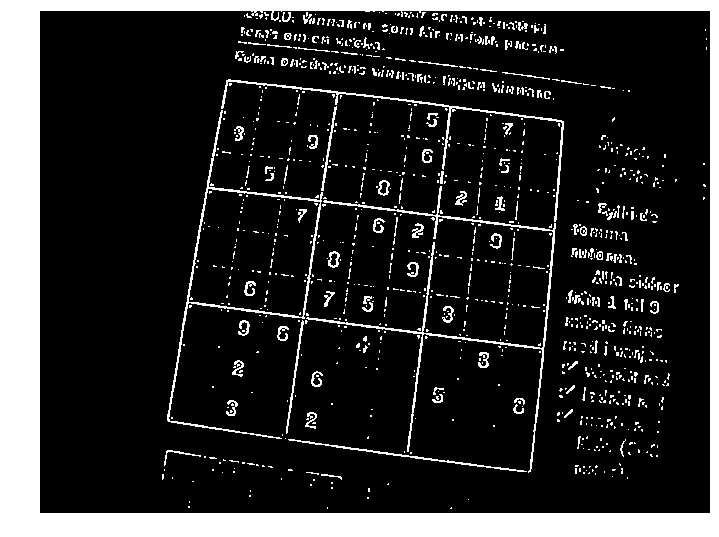

In [11]:
im_open = morphology.binary_opening(im3, ones((3,3)), iterations=2)
figure(figsize=(12, 12))
gray()
imshow(im_open)
axis('off')
show()

In [12]:
# Hough transform
imin = im_open
imhough = zeros((256, 256))
for y in range(imin.shape[0]):
    for x in range(imin.shape[1]):
        if (imin[y, x]>0):
            for i in range(256):            
                t = math.pi/2*i/256
                r = x*math.cos(t)+y*sin(t)
                r = r*255/sqrt(imin.shape[0]**2 + imin.shape[1]**2)
                imhough[int(r), i] = imhough[int(r), i] + 1

In [13]:
imin = im_open
imhough = zeros((1024, 1024))
for y in range(imin.shape[0]):
    for x in imin[y].nonzero()[0]:
        i = array(range(1024))
        t = pi/2*i/512
        r = x*np.cos(t)+y*np.sin(t)
        r = 1023.0*r/sqrt(imin.shape[0]**2 + imin.shape[1]**2) + 0.5
        imhough[r.astype(int), i] += 1

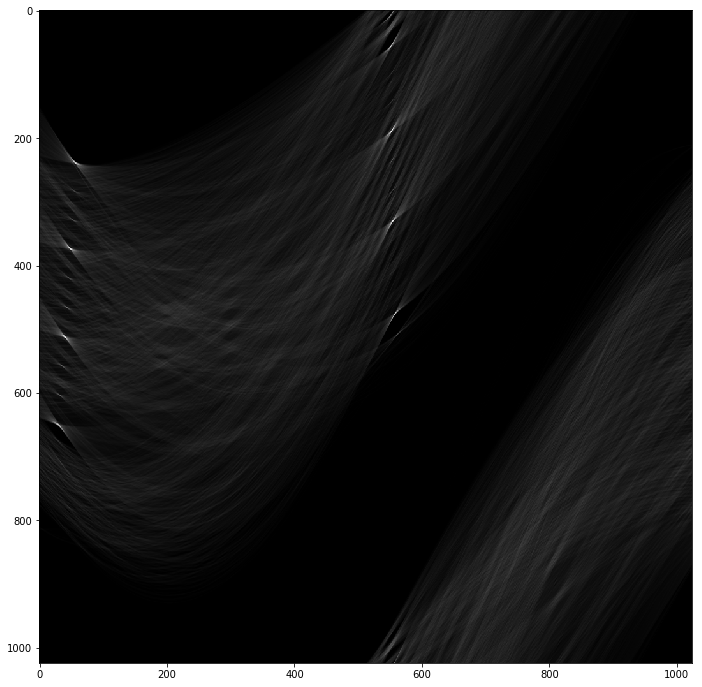

In [14]:
figure(figsize=(12, 12))
gray()
imshow(imhough)
show()

[[190, 552], [331, 554], [513, 41], [374, 49], [239, 56], [477, 557], [57, 551], [650, 30]]


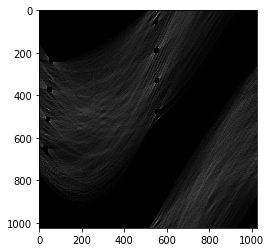

In [15]:
peaks=[]
nbr_peaks = 8
im4 = np.array(imhough)
for i in range(nbr_peaks):
    ym = argmax(im4)/im4.shape[0]
    xm = argmax(im4)%im4.shape[0]
    peaks.append([ym, xm])
    ymin = max(0, ym-10)
    xmin = max(0, xm-10)
    ymax = min(im4.shape[0], ym+10)
    xmax = min(im4.shape[1], xm+10)
    im4[ymin:ymax, xmin:xmax] = -1
print peaks
figure()
imshow(im4)
show()

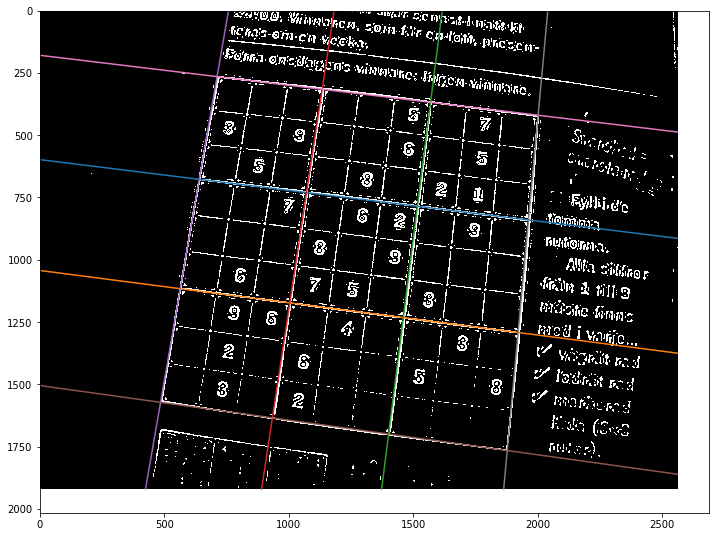

In [20]:
figure(figsize=(12, 12))
imshow(im3)
lines = []
for [rmax, tmax] in peaks:
    rmax = 1.0*rmax
    tmax = 1.0*tmax
    # print rmax, tmax
    im4 = im3.copy()
    t = math.pi/2*tmax/512
    r = rmax/1024*math.sqrt(im2.shape[0]**2 + im2.shape[1]**2)
    # print t, tmax/512*90, r, math.sqrt(im2.shape[0]**2 + im2.shape[1]**2)
    x0 = 0
    y0 = r/math.sin(t)
    if (y0<0):
        y0 = 0
        x0 = r/math.cos(t)
    elif (y0>=im4.shape[0]):
        y0 = im4.shape[0]
        x0 = (r-y0*math.sin(t))/math.cos(t)
    x1 = im4.shape[1]
    y1 = (r - math.cos(t)*x1)/math.sin(t)
    if (y1<0):
        y1 = 0
        x1 = r/math.cos(t)
    elif (y1>=im4.shape[0]):
        y1 = im4.shape[0]
        x1 = (r-y1*math.sin(t))/math.cos(t)
    x0, x1, y0, y1 = map(int, (x0+0.5, x1+0.5, y0+0.5, y1+0.5))
    plot([x0, x1], [y0, y1])
    # print (x0, y0), (x1, y1)
    lines.append([[x0, x1], [y0, y1]])
show()

In [21]:
print lines

[[[0, 2560], [598, 914]], [[0, 2560], [1043, 1375]], [[1373, 1616], [1920, 0]], [[891, 1182], [1920, 0]], [[425, 758], [1920, 0]], [[0, 2560], [1505, 1861]], [[0, 2560], [179, 487]], [[1863, 2040], [1920, 0]]]


In [63]:
from itertools import combinations

crosses = []
xs = []
ys = []
for l1, l2 in combinations(lines, 2):
    x0, x1, y0, y1 = l1[0][0], l1[0][1], l1[1][0], l1[1][1]
    x2, x3, y2, y3 = l2[0][0], l2[0][1], l2[1][0], l2[1][1]
    m1 = array([[x0-x1, x3-x2], [y0-y1, y3-y2]])
    m2 = array([[x3-x1], [y3-y1]])
    if np.linalg.det(m1)==0:
        continue
    res = np.dot(np.linalg.inv(m1), m2)
    # print res
    a = res[0, 0]
    b = res[1, 0]
    if (a<=0 or a>=1) or (b<=0 or b>=1):
        continue
    # print 'a, b: ', a, b
    xout = a*x0 + (1-a)*x1
    yout = a*y0 + (1-a)*y1
    xout2 = b*x2 + (1-b)*x3
    yout2 = b*y2 + (1-b)*y3
    xout, yout, xout2, yout2 = map(int, (xout+0.5, yout+0.5, xout2+0.5, yout2+0.5))
    xs.append(xout)
    ys.append(yout)
    if not (xout==xout2 and yout==yout2):
        print 'xout, yout:', xout, yout
        print 'xout2, you2:', xout2, yout2
crosses = [xs, ys]

In [64]:
print crosses

[[1517, 1071, 641, 1963, 1460, 1004, 564, 1921, 1401, 1569, 934, 1134, 485, 712, 1877, 2001], [785, 730, 677, 840, 1232, 1173, 1116, 1292, 1700, 368, 1635, 315, 1572, 265, 1766, 420]]


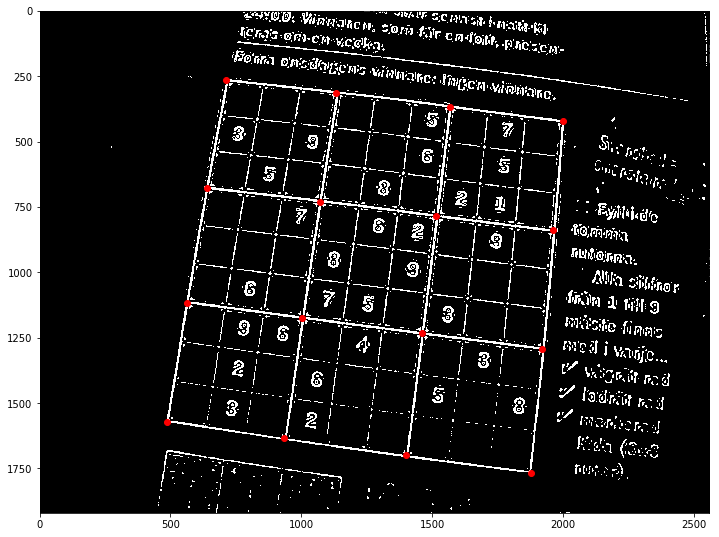

In [65]:
figure(figsize=(12, 12))
imshow(im3)
plot(xs, ys, 'ro')
show()

In [74]:
distances = []
xc, yc = sum(xs)/len(xs), sum(ys)/len(ys)
print xc, yc
distances = [sqrt((x0-xc)**2 + (y0-yc)**2) for x0, y0 in zip(xs, ys)]
# print distances
rind = argsort(distances)
print rind
xn = [xs[i] for i in rind[::-1]]
yn = [ys[i] for i in rind[::-1]]
xn = xn[:4]
yn = yn[:4]

1265 992
[ 4  5  1  0 11  9  2  6  3  8  7 10 13 15 12 14]


In [79]:
degrees = [math.atan2(y-yc, x-xc) for x, y in zip(xn, yn)]
dind = argsort(degrees)
xn = [xn[i] for i in dind]
yn = [yn[i] for i in dind]
print xn, yn

[712, 2001, 1877, 485] [265, 420, 1766, 1572]


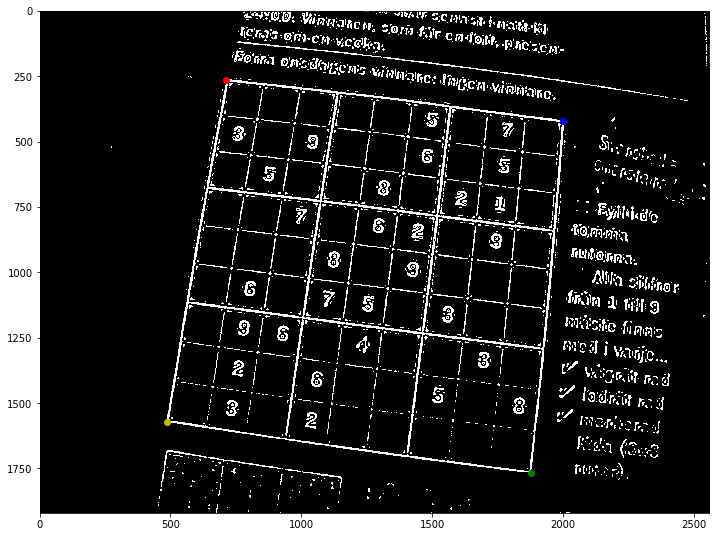

In [82]:
figure(figsize=(12, 12))
imshow(im3)
plot(xn[0], yn[0], 'ro')
plot(xn[1], yn[1], 'bo')
plot(xn[2], yn[2], 'go')
plot(xn[3], yn[3], 'yo')
show()

In [83]:
from scipy import ndimage
import homography

In [105]:
xt = [x-30 if (x<xc) else x+30 for x in xn]
yt = [y-30 if (y<yc) else y+30 for y in yn]
fp = array([array([y, x, 1]) for x, y in zip(xt, yt)]).T
tp = array([[0, 0, 1], [0, 1000, 1], [1000, 1000, 1], [1000, 0, 1]]).T

In [106]:
H = homography.H_from_points(tp, fp)

In [107]:
def warpfcn(x):
    x = array([x[0], x[1], 1])
    xt = dot(H, x)
    xt = xt/xt[2]
    return xt[0], xt[1]

In [130]:
im_g = ndimage.geometric_transform(im, warpfcn, (1000, 1000))

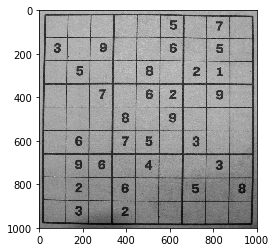

In [131]:
figure()
imshow(im_g)
show()

In [119]:
# todo find the right direction

In [129]:
from scipy.ndimage import measurements

In [121]:
def find_sudoku_edges(im, axis=0):
    """ Finds the cell edges for an aligned sudoku image."""
    
    # threshold and sum rows and columns
    trim = 1*(im<128)
    s = trim.sum(axis=axis)
    
    # find center of strongest lines
    s_labels, s_nbr = measurements.label(s>(0.5*max(s)))
    m = measurements.center_of_mass(s, s_labels, range(1, s_nbr+1))
    x = [int(x[0]) for x in m]
    
    # if only the strong lines are detected and lines in between
    if len(x)==4:
        dx = diff(x)
        x = [x[0], x[0]+dx[0]/3, x[0]+2*dx[0]/3,
            x[1], x[1]+dx[1]/3, x[1]+2*dx[1]/3,
             x[2], x[2]+dx[2]/3, x[2]+2*dx[2]/3, x[3]]
        
    if len(x)==10:
        return x
    else:
        raise RuntimeError('Edges not detected.')

In [136]:
def compute_feature(im):
    """ Returns a feature vector for an
    ocr image patch. """
    
    # resize and remove border
    norm_im = imresize(im, (30, 30))
    norm_im = norm_im[3:-3, 3:-3]
    
    return norm_im.flatten()

In [143]:
def load_ocr_data(path):
    """ Return labels and ocr features for all images in path. """
    
    # create list of all files ending in .jpg
    imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
    labels = [int(imfile.split('/')[-1][0]) for imfile in imlist]
    features = []
    for imname in imlist:
        im = array(Image.open(imname).convert('L'))
        features.append(compute_feature(im))
    return array(features), labels

In [182]:
features, labels = load_ocr_data('sudoku_images/ocr_data/training/')
test_features, test_labels = load_ocr_data('sudoku_images/ocr_data/testing/')

features = map(list, features)
test_features = map(list, test_features)

prob = svm_problem(labels, features)
param = svm_parameter('-t 0')
m = svm_train(prob, param)

res = svm_predict(labels, features, m)
res = svm_predict(test_labels, test_features, m)

Accuracy = 100% (1409/1409) (classification)
Accuracy = 99.4985% (992/997) (classification)


Accuracy = 92.5926% (75/81) (classification)


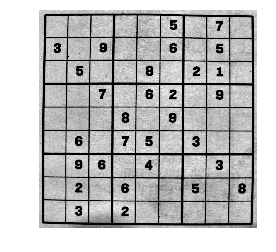

Result:
[[ 0.  0.  0.  0.  0.  5.  0.  3.  0.]
 [ 3.  0.  3.  0.  0.  4.  0.  4.  0.]
 [ 0.  3.  0.  0.  3.  0.  2.  1.  0.]
 [ 0.  0.  7.  0.  6.  2.  0.  9.  0.]
 [ 0.  0.  0.  8.  0.  9.  0.  0.  0.]
 [ 0.  6.  0.  7.  5.  0.  3.  0.  0.]
 [ 0.  9.  6.  0.  4.  0.  0.  3.  0.]
 [ 0.  2.  0.  6.  0.  0.  5.  0.  8.]
 [ 0.  3.  0.  2.  0.  0.  0.  0.  0.]]


In [254]:
from svmutil import *

imname = imlist[19]
vername = imname[:-3]+'sud'

sigma1 = 1
sigma2 = 63
img_1 = filters.gaussian_filter(im_g, sigma1)
img_2 = filters.gaussian_filter(im_g, sigma2)
img_3 = (1.0*img_1 - img_2)*4 + 150
img_3[img_3<0] = 0
img_3[img_3>255] = 255
img_3 = img_3.astype(uint8)

x = find_sudoku_edges(img_3, axis=0)
y = find_sudoku_edges(img_3, axis=1)

crops = []
for col in range(9):
    for row in range(9):
        crop = img_3[y[col]:y[col+1], x[row]:x[row+1]]
        crops.append(compute_feature(crop))

txt = loadtxt(vername)
if len(txt)<81:
    txt = txt.flatten()
res = svm_predict(txt, map(list, crops), m)[0]
res_im = array(res).reshape(9, 9)

figure()
gray()
imshow(img_3)
axis('off')
show()

print 'Result:'
print res_im

In [281]:
acc_list = []
res_list = []
for degree in range(4):
    xn_r = []
    yn_r = []
    for i in range(4):
        i2 = (i + degree) % 4
        xn_r.append(xn[i2])
        yn_r.append(yn[i2])
    xt = [x-30 if (x<xc) else x+30 for x in xn_r]
    yt = [y-30 if (y<yc) else y+30 for y in yn_r]
    fp = array([array([y, x, 1]) for x, y in zip(xt, yt)]).T
    tp = array([[0, 0, 1], [0, 1000, 1], [1000, 1000, 1], [1000, 0, 1]]).T
    
    H = homography.H_from_points(tp, fp)
    im_g = ndimage.geometric_transform(im, warpfcn, (1000, 1000))
    
    imname = imlist[19]
    vername = imname[:-3]+'sud'

    sigma1 = 1
    sigma2 = 63
    img_1 = filters.gaussian_filter(im_g, sigma1)
    img_2 = filters.gaussian_filter(im_g, sigma2)
    img_3 = (1.0*img_1 - img_2)*4 + 150
    img_3[img_3<0] = 0
    img_3[img_3>255] = 255
    img_3 = img_3.astype(uint8)

    x = find_sudoku_edges(img_3, axis=0)
    y = find_sudoku_edges(img_3, axis=1)

    crops = []
    for col in range(9):
        for row in range(9):
            crop = img_3[y[col]:y[col+1], x[row]:x[row+1]]
            crops.append(compute_feature(crop))

    txt = loadtxt(vername)
    if len(txt)<81:
        txt = txt.flatten()
    res = svm_predict(txt, map(list, crops), m)[0]
    res_im = array(res).reshape(9, 9)

    acc = sum(1.0*(res==txt))/len(txt)
    acc_list.append(acc)
    res_list.append(res_im)
    
ind = acc_list.index(max(acc_list))
print "Best accuracy: ", acc_list[ind]
print res_list[ind]

Accuracy = 92.5926% (75/81) (classification)
Accuracy = 40.7407% (33/81) (classification)
Accuracy = 71.6049% (58/81) (classification)
Accuracy = 43.2099% (34/81) (classification)
Best accuracy:  0.925925925926
[[ 0.  0.  0.  0.  0.  5.  0.  3.  0.]
 [ 3.  0.  3.  0.  0.  4.  0.  4.  0.]
 [ 0.  3.  0.  0.  3.  0.  2.  1.  0.]
 [ 0.  0.  7.  0.  6.  2.  0.  9.  0.]
 [ 0.  0.  0.  8.  0.  9.  0.  0.  0.]
 [ 0.  6.  0.  7.  5.  0.  3.  0.  0.]
 [ 0.  9.  6.  0.  4.  0.  0.  3.  0.]
 [ 0.  2.  0.  6.  0.  0.  5.  0.  8.]
 [ 0.  3.  0.  2.  0.  0.  0.  0.  0.]]
